# **Topik 13 : Model Regression**

## Import Library

Akan diimport library yang akan digunakan dalam pemodelan regresi linear dan clustering

In [ ]:
import warnings #digunakan untuk mengabaikan informasi peringatan
warnings.filterwarnings('ignore')

import numpy as np #digunakan untuk penggunaan array dan melakukan perhitungan saintifik
import pandas as pd #digunakan untuk mengelola dataframe
import seaborn as sns #digunakan untuk visualisasi
import matplotlib.pyplot as plt #digunakan untuk visualisasi
%matplotlib inline

from sklearn.linear_model import LinearRegression #digunakan untuk melakukan pemodelan regresi linear
from sklearn.model_selection import train_test_split #digunakan untuk membagi dataset menajdi data train dan test
from sklearn.metrics import mean_absolute_error #digunakan untuk menghitung means absolute error
from sklearn.metrics import mean_squared_error #digunakan untuk menghitung means square error
from sklearn.metrics import mean_absolute_percentage_error #digunakan untuk menghitung mean absolute precentage error
from sklearn.metrics import r2_score #for R Square
from sklearn.preprocessing import StandardScaler #untuk melakukan proses scalling data
from sklearn.cluster import KMeans #untuk melakukan clustering dengan K-Means
from sklearn.metrics import silhouette_score #untuk menghitung nilai silhouette score
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score #untuk melakukan evaluasi matriks

## Load Data

Load dataset yang memiliki format csv yang diberi nama df dengan bantuan library pandas dengan code `df=pd.read_csv('train.csv)`.

Notes : data yang akan dipakai harus berada dalam directory google colab dengan cara mengupload

In [ ]:
df=pd.read_csv('train.csv')

## **Exploratory Data Analysis**

## Identifikasi Data

**Menampilkan Data**

Akan ditampilkan 5 baris teratas dari data house price dengan code `df.head()`. Hal ini dilakukan untuk mengetahui gambaran awal data seperti apakah strukturnya sudah sesuai atau belum sehingga dapat mempermudah proses eksplorasi data selanjutnya.

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Analisis dataset House Pricing ini bertujuan untuk melakukan prediksi SalePrice dengan pemodelan regresi linear. 

Dalam dataset ini berisi variabel-variabel sebagai berikut:
- SalePrice - harga jual properti dalam dolar. Ini adalah variabel target yang Anda coba prediksi.
- MSSubClass: Kelas Bangunan 
- MSZoning: Klsifikasi zonasi umum
- LotFrontage: Kaki linier jalan yang terhubung ke properti
- LotArea: Ukuran lot dalam kaki persegi
Street: Jenis akses jalan
- Alley: Jenis akses gang
- LotShape: Bentuk umum properti
- LandContour: Kerataan properti
- Utilities: Jenis utilitas yang tersedia
- LotConfig: konfigurasi lot
- LandSlope: Kemiringan properti
- Neighborhood: Lokasi fisik dalam batas kota Ames
- Condition1: Dekat dengan jalan utama atau rel kereta api
- Condition2: Kedekatan dengan jalan utama atau rel kereta api (jika ada yang kedua)
- BldgType: Jenis tempat tinggal
- HouseStyle: Gaya hunian
- OverallQual: Bahan keseluruhan dan kualitas akhir
- OverallCond: Peringkat kondisi keseluruhan
- YearBuilt: Tanggal konstruksi asli
- YearRemodAdd: Merombak tanggal
- RoofStyle: Jenis atap
- RoofMatl: Bahan atap
- Exterior1st: Penutup eksterior pada rumah
- Exterior2nd: Penutup eksterior pada rumah (jika lebih dari satu material)
- MasVnrType: Jenis veneer batu bata
- MasVnrArea: Area veneer batu dalam kaki persegi
- ExterQual: Kualitas material eksterior
- ExterCond: Kondisi material saat ini di bagian luar
- Foundation: Jenis Pondasi
- BsmtQual: Ketinggian ruang bawah tanah
- BsmtCond: Kondisi umum ruang bawah tanah
- BsmtExposure: Walkout atau dinding ruang - bawah tanah tingkat taman
- BsmtFinType1: Kualitas area finishing basement
- BsmtFinSF1: Tipe 1 jadi kaki persegi
- BsmtFinType2: Kualitas area finishing kedua (jika ada)
- BsmtFinSF2: Tipe 2 jadi kaki persegi
- BsmtUnfSF: Kaki persegi area basement yang belum selesai
- TotalBsmtSF: Total kaki persegi area basement
- Heating: Jenis pemanasan 
- HeatingQC: Kualitas dan kondisi pemanasan
- CentralAir: AC Sentral
- Electrical: Sistem kelistrikan
- 1stFlrSF: Kaki persegi Lantai Pertama
- 2ndFlrSF: Kaki persegi lantai dua
- LowQualFinSF: Kaki persegi dengan finishing berkualitas rendah (semua lantai)
- GrLivArea: Ruang tamu di atas kelas (tanah) kaki persegi
- BsmtFullBath: Kamar mandi bawah tanah lengkap
- BsmtHalfBath: Kamar mandi setengah bawah tanah
- FullBath: Kamar mandi lengkap di atas kelas
- HalfBath: Setengah mandi di atas kelas
- Bedroom: Jumlah kamar tidur di atas lantai bawah tanah
- Kitchen: Jumlah dapur
- KitchenQual: Kualitas dapur
- TotRmsAbvGrd: Total kamar di atas kelas (tidak termasuk kamar mandi)
- Functional: Peringkat fungsionalitas rumah
- Fireplaces: Jumlah perapian
- FireplaceQu: kualitas perapian
- GarageType: lokasi garasi
- GarageYrBlt: Tahun garasi dibangun
- GarageFinish: Finishing interior garasi
- GarageCars: Ukuran garasi dalam kapasitas mobil
- GarageArea: Ukuran garasi dalam kaki persegi
- GarageQual: Kualitas garasi
- GarageCond: Kondisi garasi
- PavedDrive: Jalan beraspal
- WoodDeckSF: Area dek kayu dalam kaki persegi
- OpenPorchSF: Area beranda terbuka dalam kaki persegi
- EnclosedPorch: Area teras tertutup dalam kaki persegi
- 3SsnPorch: Area beranda tiga musim dalam kaki persegi
- ScreenPorch: Area teras layar dalam kaki persegi
- PoolArea: Area kolam dalam kaki persegi
- PoolQC: Kualitas kolam
- Fence: Kualitas pagar
- MiscFeature: Fitur lain yang tidak tercakup dalam kategori lain
- MiscVal: $Nilai fitur lain-lain
- MoSold: Bulan terjual
- YrSold: Tahun terjuan
- SaleType: Jenis penjualan
- SaleCondition: Kondisi Penjualan

---
**Jumlah Data**


In [ ]:
df.shape

(1460, 81)

Berdasarkan output di atas terlihat bahwa jumlah data sebanyak 1460 dengan 119 variabel.

---
**Informasi Data**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Berdasarkan output diatas terdapat beberapa missing value data sehingga perlu dilakukan data cleansing.


## Data Cleansing

### Data Type

Berdasarkan output informasi data tersebut, terdapat beberapa variabel yang memiliki tipe data yang kurang sesuai sehingga perlu dirubah. 

- `MSSubClass` seharusnya bertipe object 
karena merupakan data kategorik dengan 16 kategori

- `OverallQual` seharusnya bertipe object karena merupakan data kategorik dengan 10 kategori

- `OverallCond` seharusnya bertipe object karena merupakan data kategorik dengan 10 kategori

- `YearBuilt` seharunya bertipe object karena bukan merupakan suatu bilangan numerik yang bisa dilakukan operasi hitung

- `YearRemodAdd` seharunya bertipe object karena bukan merupakan suatu bilangan numerik yang bisa dilakukan operasi hitung

- `GarageYrBlt` seharunya bertipe object karena bukan merupakan suatu bilangan numerik yang bisa dilakukan operasi hitung

- `MoSold` seharusnya bertipe object karena merupakan data kategorik dengan 12 kategori

- `YrSold` seharunya bertipe object karena bukan merupakan suatu bilangan numerik yang bisa dilakukan operasi hitung

Akan dirubah dengan code `namadataframe['kolom yang dirubah']=namadataframe['kolom yang dirubah'].astype('O')` dimana O adalah object

In [ ]:
df['MSSubClass']=df['MSSubClass'].astype('O')
df['OverallQual']=df['OverallQual'].astype('O')
df['OverallCond']=df['OverallCond'].astype('O')
df['YearBuilt']=df['YearBuilt'].astype('O')
df['YearRemodAdd']=df['YearRemodAdd'].astype('O')
df['GarageYrBlt']=df['GarageYrBlt'].astype('O')
df['MoSold']=df['MoSold'].astype('O')
df['YrSold']=df['YrSold'].astype('O')

### Missing Value

Variabel yang memiliki NaN value, yaitu :
*   LotFrontage, akan dihandling dengan mengisi dengan median data
*   Alley, akan dihapus karena terlalu banyak data yang kosong
*   MasVnrType, akan dihandling dengan mengisi dengan modus data 
*   MasVnrArea, akan dihandling dengan mengisi median data
*   BsmtQual, akan dihandling dengan mengisi dengan modus data 
*   BsmtExposure, akan dihandling dengan mengisi dengan modus data 
*   BsmtFinType1, akan dihandling dengan mengisi dengan modus data 
*   BsmtCond, akan dihandling dengan mengisi dengan modus data 
*   BsmtFinType2, akan dihandling dengan mengisi dengan modus data 
*   Electrical, akan dihandling dengan mengisi dengan modus data 
*   FireplaceQu, akan dihandling dengan mengisi dengan modus data 
*   GarageType, akan dihandling dengan mengisi dengan modus data 
*   GarageYrBlt, akan dihandling dengan mengisi dengan modus data 
*   GarageFinish, akan dihandling dengan mengisi dengan modus data 
*   GarageQual, akan dihandling dengan mengisi dengan modus data 
*   GarageCond, akan dihandling dengan mengisi dengan modus data 
*   PoolQC, akan dihapus karena terlalu banyak data yang kosong
*   Fence, akan dihapus karena terlalu banyak data yang kosong
*   MiscFeature, akan dihapus karena terlalu banyak data yang kosong



---
Missing Value Handling

- Missing value dengan nilai median : `namadataframe['kolom yang dipilih']=namadataframe['kolom yang dipilih'].fillna(namadataframe['kolom yang dipilih'].median())`

- Missing value dengan mendrop kolom : `namadataframe=namadataframe.drop('kolom yang dipilih',axis=1)` dimana axis=1 menunjukan seluruh kolom

- Missing value dengan nilai mode (data object kategorik) :`namadataframe['kolom yang dipilih']=namadataframe['kolom yang dipilih'].fillna(namadataframe['kolom yang dipilih'].mode()[0])`

In [ ]:
df=df.drop('Id',axis=1)
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df=df.drop('Alley',axis=1)
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df=df.drop('PoolQC',axis=1)
df=df.drop('Fence',axis=1)
df=df.drop('MiscFeature',axis=1)



---
**Informasi Data Setelah dilakukan Missing Value Handling**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearBuilt      1460 non-null   object 
 18  YearRemo

Berdasarkan output di atas semua variabel sudah tidak mengandung missing value dan tipe datanya telah sesuai.

---
**Memisahkan data kategorik dan numerik**


In [ ]:
#kode untuk data kategorik dengan melakukan looping pada setiap kolom jika bertipe object dan bukan data tahun
cats=[i for i in df.columns if df[i].dtypes == 'object' and i!='YearBuilt' and i!='YearRemodAdd' and i!='GarageYrBlt' and i!='YrSold']

#kode untuk data numerik dengan melakukan looping pada setiap kolom jika bukan bertipe object dan bukan data SalePrice sebagai variabel target
nums=[i for i in df.columns if df[i].dtypes != 'object' and i!='SalePrice']

In [ ]:
#kode untuk melihat variabel kategorik
cats

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [ ]:
#kode untuk melihat variabel numerik
nums

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

### Encoding Data

Akan dilakukan encoding data dengan metode `frequency encoding` agar meminimalisir sparse data karena apabila menggunakan one hot encoding akan muncul banyak kolom baru karena jumlah variabel kategorik yang cukup banyak.

In [ ]:
# Frequency Encoding
for col in cats:
  freq_et = df[col].value_counts().reset_index() #untuk menghitung unique value di setiap variabel dalam dataframe
  freq_et.rename(columns={"index": f"{col}", f"{col}": f"freq_{col}"}, inplace = True)#untuk mengganti nama kolom
  freq_et[f'pct_{col}'] = round((freq_et[f"freq_{col}"]/freq_et[f"freq_{col}"].sum())*100,2)#membuat kolom baru 'presentase unique value setiap variabel
  df = df.merge(freq_et[[f'{col}',f'pct_{col}']], on=f'{col}', how='inner') #menggabungkan kolom presentase yang baru dibuat dengan dataframe

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,pct_Functional,pct_FireplaceQu,pct_GarageType,pct_GarageFinish,pct_GarageQual,pct_GarageCond,pct_PavedDrive,pct_MoSold,pct_SaleType,pct_SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,93.15,73.29,65.14,28.9,95.34,96.37,91.78,3.56,86.78,82.05
1,60,RL,69.0,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,93.15,73.29,65.14,28.9,95.34,96.37,91.78,3.56,86.78,82.05
2,60,RL,75.0,9675,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,93.15,73.29,65.14,28.9,95.34,96.37,91.78,3.56,86.78,82.05
3,20,RL,64.0,7314,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,93.15,73.29,65.14,28.9,95.34,96.37,91.78,3.56,86.78,82.05
4,20,RL,64.0,6762,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,93.15,73.29,65.14,28.9,95.34,96.37,91.78,3.56,86.78,82.05


Berdasarkan output di atas terlihat bahwa telah terbentuk kolom baru yang menampilkan data numerik dari setiap variabel kategorik.

### Outlier

**Outlier Detection**

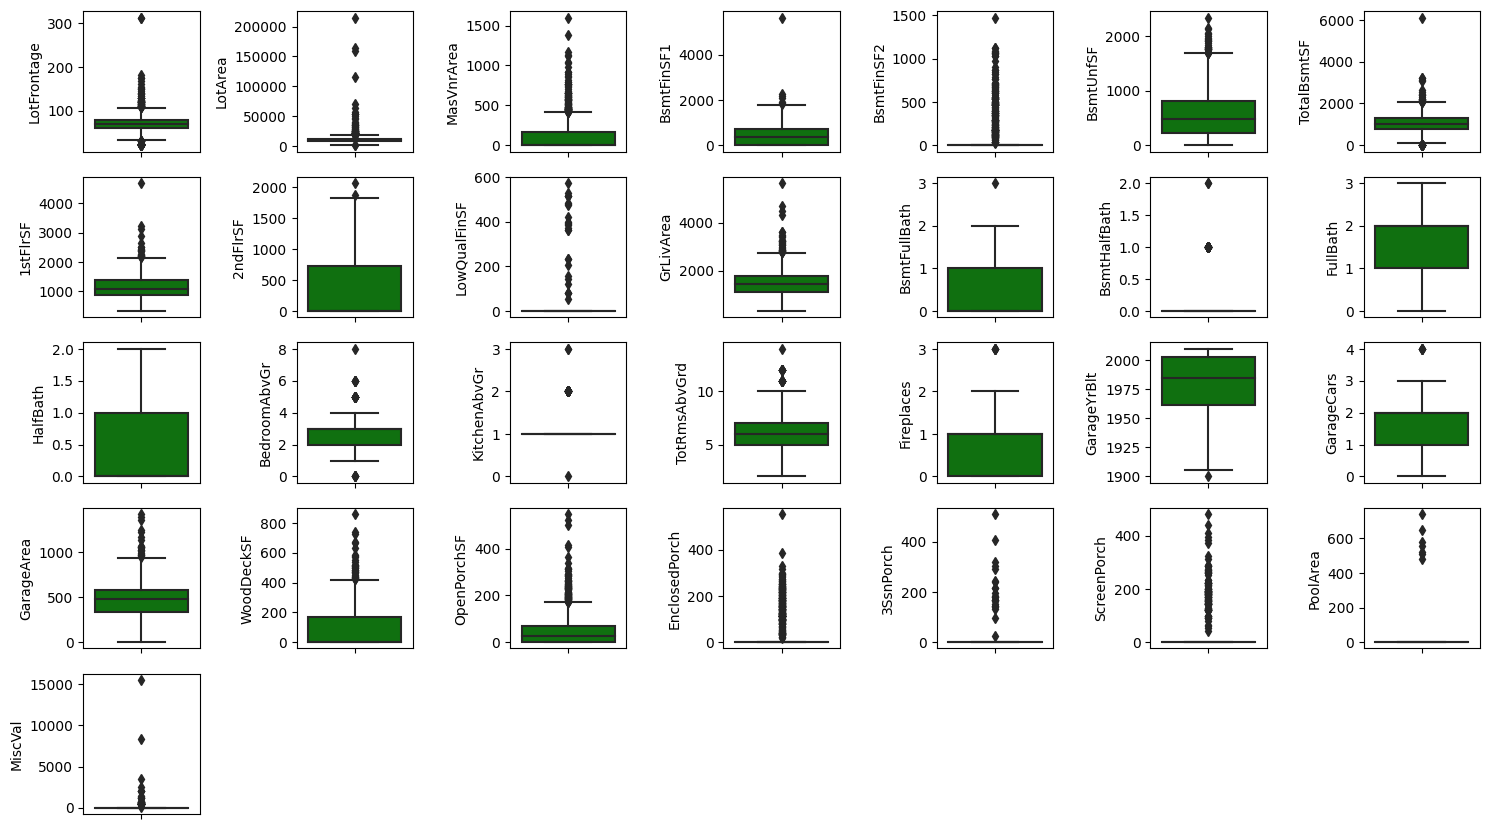

In [ ]:
plt.figure(figsize=(15,10)) #membuat plot dengan ukuran panjang 15 dan lebar 10
for i in range(0, len(nums)): #fungsi looping dari 0 hingga banyaknya kolom nums
    plt.subplot(6, 7 , i+1) #untuk membuat sub plot
    sns.boxplot(y=df[nums[i]], color='green', orient='v') #membuat plot dengan bantuan library seaborn
    plt.tight_layout() #untuk merapatkan visualisasi

Berdasarkan output boxplot di atas terlihat bahwa hampir seluruh vaiabel numerik dalam dataset memiliki outlier yang cukup banyak sehingga perlu dilakukan outlier handling dengan metode `log transformation`

---
**Outlier Handling**


In [ ]:
for col in nums: #fungsi looping dari 0 hingga banyaknya kolom nums
  df[col] = np.log(df[col]+1) #mengbah data numerik dalam dataframe dengan data yang telah melalui log transformation dengan bantuan numpy

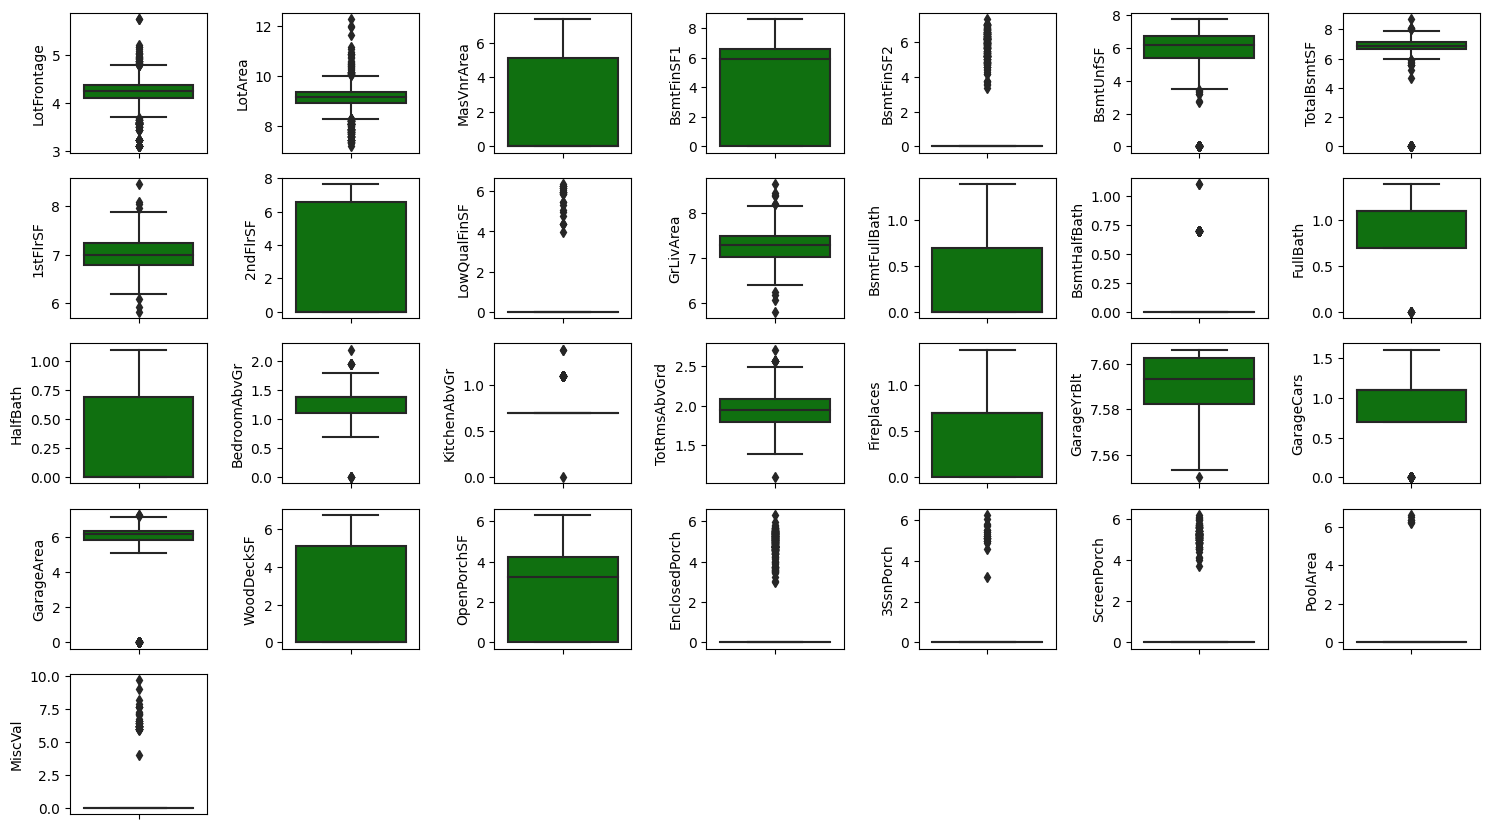

In [ ]:
plt.figure(figsize=(15,10)) #membuat plot dengan ukuran panjang 15 dan lebar 10
for i in range(0, len(nums)): #fungsi looping dari 0 hingga banyaknya kolom nums
    plt.subplot(6, 7 , i+1) #untuk membuat sub plot
    sns.boxplot(y=df[nums[i]], color='green', orient='v') #membuat plot dengan bantuan library seaborn
    plt.tight_layout() #untuk merapatkan visualisasi

Berdasarkan output di atas terlihat bahwa jumlah outlier pada variabel numerik dalam dataset lebih sedikit dibandingkan yang sebelumnya.

## Statistical Summary

### Pendekatan Numerik

In [ ]:
#kode statistik deskriptif pada variabel numerik
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,4.214451,0.314395,3.091042,4.110874,4.248495,4.382027,5.749393
LotArea,1460.0,9.110966,0.517369,7.170888,8.929898,9.156887,9.358976,12.279537
MasVnrArea,1460.0,2.120264,2.628759,0.000000,0.000000,0.000000,5.107456,7.378384
BsmtFinSF1,1460.0,4.229731,2.992052,0.000000,0.000000,5.951943,6.569832,8.638525
BsmtFinSF2,1460.0,0.655398,1.845045,0.000000,0.000000,0.000000,0.000000,7.296413
BsmtUnfSF,1460.0,5.648378,1.854020,0.000000,5.411646,6.170651,6.695799,7.756623
TotalBsmtSF,1460.0,6.750560,1.145712,0.000000,6.680541,6.900227,7.169542,8.717846
1stFlrSF,1460.0,7.008452,0.317431,5.814131,6.783325,6.992096,7.238676,8.453827
2ndFlrSF,1460.0,2.864586,3.293311,0.000000,0.000000,0.000000,6.591674,7.633370
LowQualFinSF,1460.0,0.099814,0.747354,0.000000,0.000000,0.000000,0.000000,6.350886


Berdasarkan output di atas dapat diketahui bahwa:

Distribusi right skewed ditandai dengan nilai mean yang lebih besar daripada nilai median. Dalam statistik deskriptif ini variabel yang memeiliki right skewed distribution adalah `MaVnrArea`, `BsmtFinSF2`, `1stFlrSF`, `2ndFlrSF`, `LowQualFinSF`, `BsmtFullBath`,  `BsmtHalfBath`, `HalfBath`, `KitchenAbvGr`,  `TotRmsAbvGrd`, ` WoodDeckSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`. Sedangkan varibel lainnya memiliki kecenderungan left skewed distribution dimana nilai median yang lebih tinggi dibandingan nilai mean
 

### Pendekatan Kategorik

In [ ]:
#kode statistik deskriptif variabel kategorik
df[cats].describe()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,4,4,2,5,3,25,9,...,7,5,6,3,5,5,3,12,9,6
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Typ,Gd,Attchd,Unf,TA,TA,Y,6,WD,Normal
freq,536,1151,1454,925,1311,1459,1052,1382,225,1260,...,1360,1070,951,686,1392,1407,1340,253,1267,1198


Berdasarkan output di atas, diketahui:
- dari baris `count` diketahui terdapat Nilai NULL untuk setiap variabel.
- dari baris `unique` diketahui jumlah nilai jenis untuk setiap variabel. Dan count unique untuk setiap variabel sudah sesuai.
- dari baris `top` menunjukkan sebagian besar/modus unik untuk setiap variabel.
- dari baris `freq` tampilkan jumlah modus unique (hitung nilai terbanyak) untuk setiap variabel. Dan berdasarkan baris `freq`, kita dapat membandingkan `hitung nilai terbanyak` dengan `nilai total` pada baris `hitung` untuk setiap variabel sehingga kita mengetahui distribusi untuk masing-masing variabel. 

Diketahui bahwa hampir seluruh variabel memiliki ketimpangan yang terlalu tinggi kecuali variabel `GarageFinish`, `BsmtFinType1`, `Neighborhood`

## Univariate Analysis

### Histogram Plot

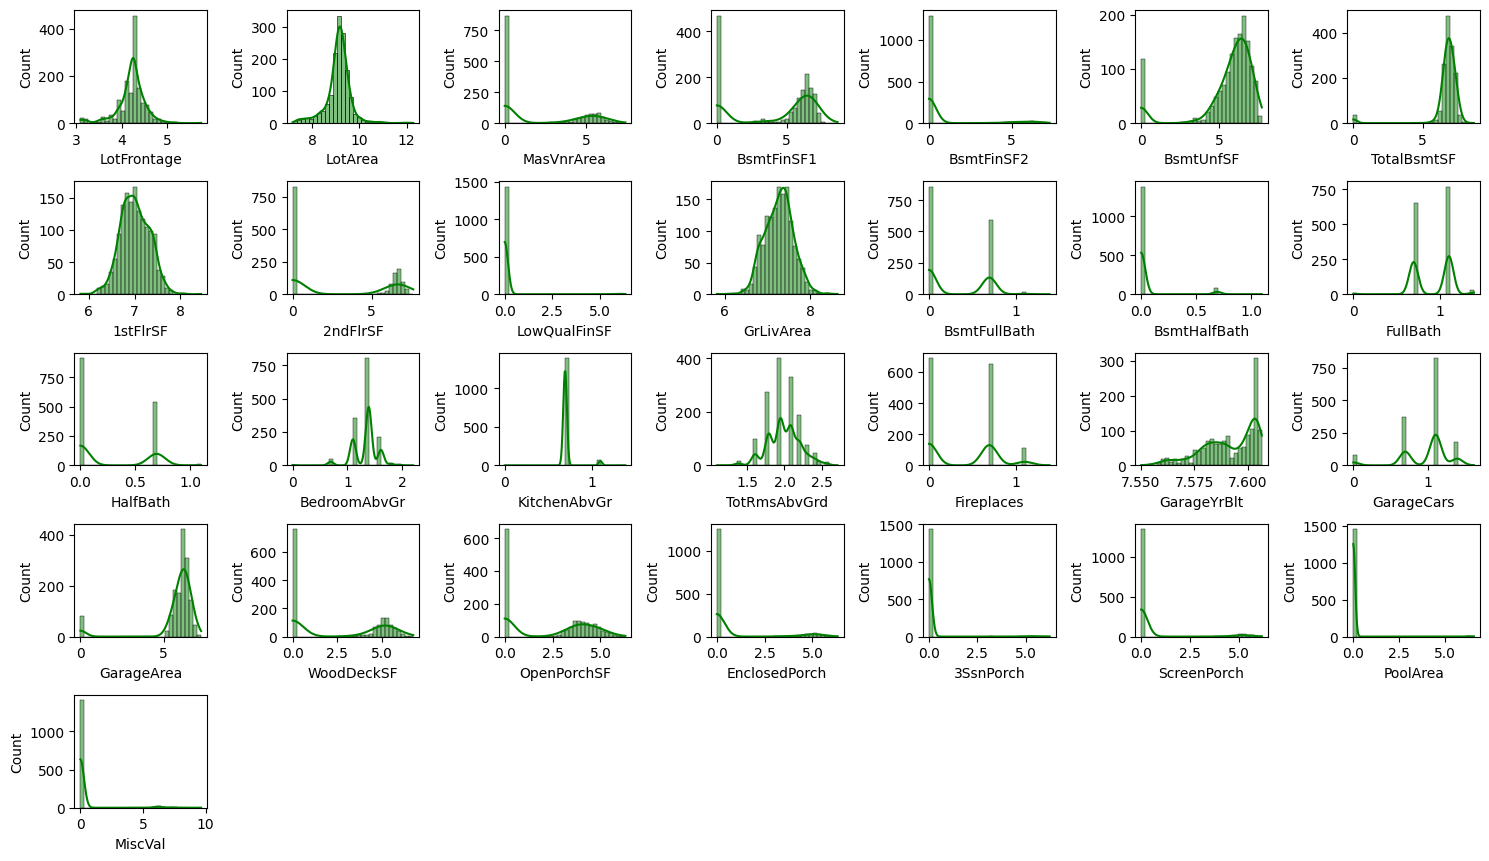

In [ ]:
plt.figure(figsize=(15, 10)) #membuat plot dengan ukuran panjang 15 dan lebar 10
for i in range(0, len(nums)): #fungsi looping dari 0 hingga jumlah variabel numerik
    plt.subplot(6, 7, i+1) #membuat subplot
    sns.histplot(df[nums[i]], color='green', kde=True, bins = 30) #membuat histplot dengan library seaborn
    plt.tight_layout() #merapatkan visualisasi

Berdasarkan distibusi plot di atas dapat diketahui bahwa:

Hampir seluruh variabel tidak memiliki bentuk plot yang simetris sempurna sehingga data dapat dikatakan tidak berdistribusi normal, namun terdapat beberapa data yang hampir memiliki distribusi plot yang simetris diantaranya `LotFrotage` dan `LotArea`.

### Count Plot

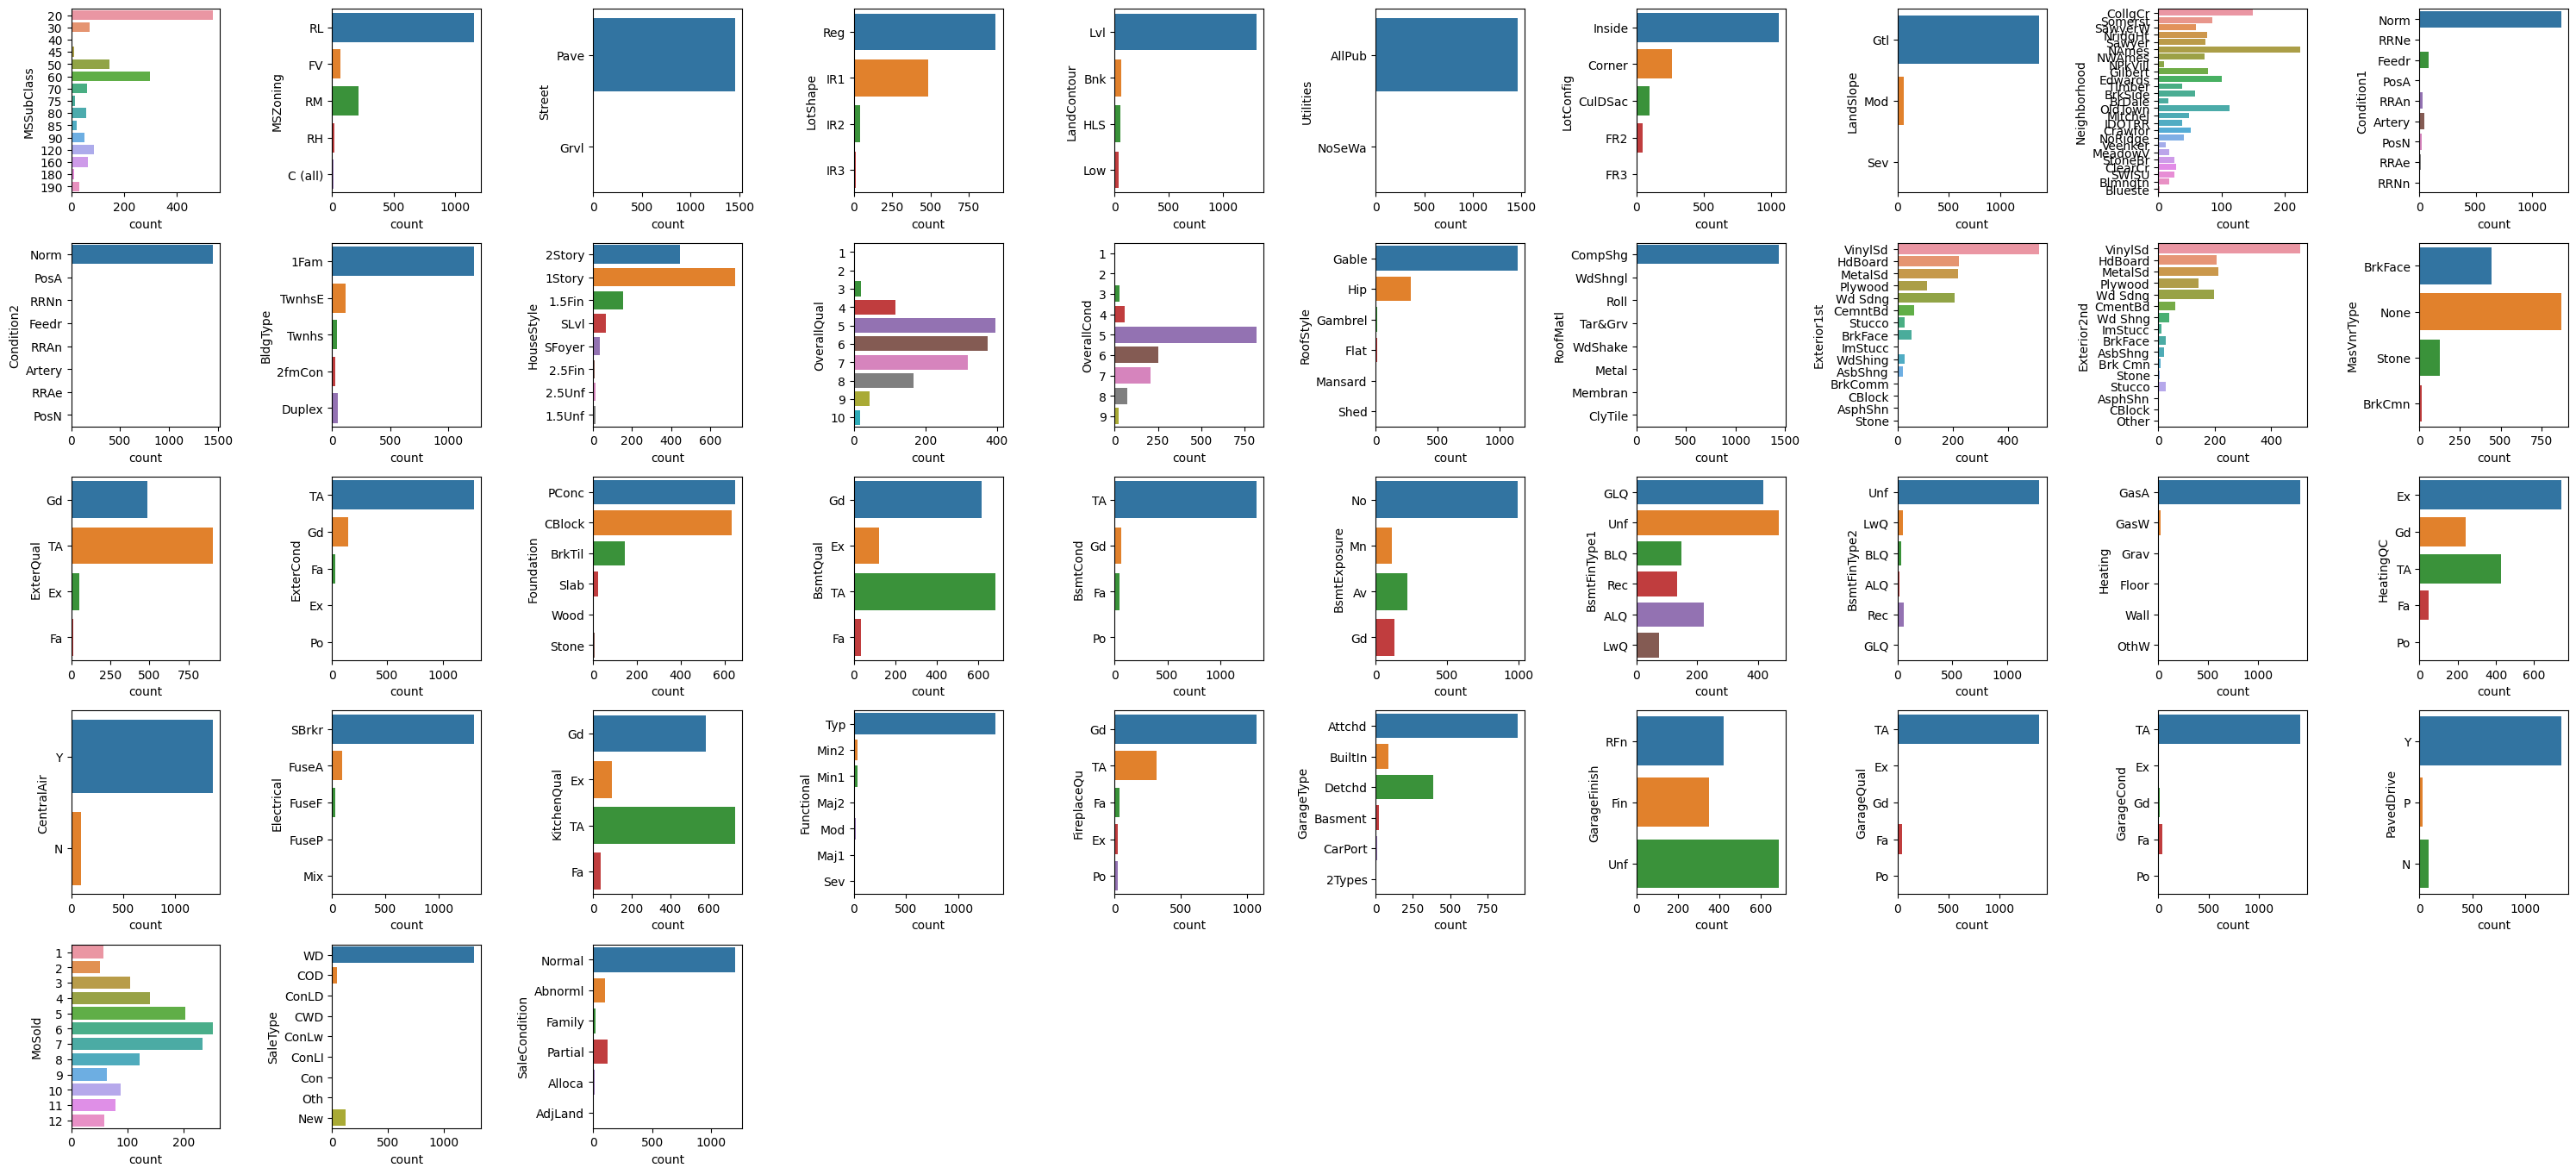

In [ ]:
plt.figure(figsize=(30, 35)) #membuat plot dengan ukuran panjang 30 dan lebar 35
for i in range(0, len(cats)): #fungsi looping dari i ke 0 hingga jumlah variabel kategorik
    plt.subplot(13, 10, i+1) #membuat subplot
    sns.countplot(y = df[cats[i]], orient='v') #membuat countplot dengan library seaborn dengan orientasi vertikal
    plt.tight_layout() #merapkan visualisasi

Berdasarkan count plot di atas terlihat bahwa diketahui bahwa hampir seluruh variabel memiliki ketimpangan yang terlalu tinggi kecuali variabel `GarageFinish`, `BsmtFinType1`, `Neighborhood`

## Multivariate Analysis

### Heatmap

In [ ]:
plt.figure(figsize=(50, 20)) #untuk membuat plot dengan panjang 50 dan lebar 20
sns.heatmap(df.corr(), annot=True, fmt='.2f') #membuat heatmap dengan library seaborn dengan menampilkan korelasi disetiap variabel yang ada dalam dataframe df

Output hidden; open in https://colab.research.google.com to view.

Berdasarkan heatmap di atas bisa kita lihat untuk variabel yang berkorelasi tinggi memiliki warna yang lebih terang dan untuk nilai lebih detailnnya dapat dilihat melalui dataframe berikut :

In [ ]:
pd.set_option('display.max_rows', 100) #menampilkan maksimal row
df_corr_SalePrice=df.corr()['SalePrice'].sort_values(ascending=False).reset_index() #menampilkan nilai korelasi seluruh variabel dengan variabel sale price
df_corr_SalePrice #menampilkan nilai korelasi

,index,SalePrice
0,SalePrice,1.000000
1,GrLivArea,0.695147
2,1stFlrSF,0.591299
3,GarageCars,0.576617
4,FullBath,0.537412
5,TotRmsAbvGrd,0.522355
6,Fireplaces,0.480136
7,OpenPorchSF,0.429970
8,MasVnrArea,0.405162
9,pct_HeatingQC,0.399542


Berdasarkan output di atas terlihat bahwa terdapat 7 variabel yang memiliki korelasi kuat dengan nilai korelasi di atas 0.5 dengan variabel `SalePrice`, yaitu `GrLivArea` = 0.695147, `1stFlrSF` = 0.591299, `GarageCars` = 0.576617, `FullBath` = 0.537412, `TotRmsAbvGrd` = 0.522355 , `pct_GarageFinish` = -0.535838, `pct_ExterQual` = -0.614493 sehingga ketujuh variabel ini yang akan dijadikan sebagai variabel independen atau prediktor dalam pemodelan regresi linear.

## Train and Test Split

Sebelum melakukan pemodelan, data akan dibagi menjadi data training dan data testing. Data train akan digunakan untuk membentuk model regresi, sedangkan data testing akan digunakan untuk melakukan evaluasi model yang telah dibuat menggunakan data training.

In [ ]:
#Membuat dataframe 'data' yang diambil dari dataframe df  dimana berisikan variabel target dan prediktor
data=df[['GrLivArea','1stFlrSF','GarageCars','FullBath', 'TotRmsAbvGrd','pct_GarageFinish', 'pct_ExterQual','SalePrice']]

#Membuat dataframe 'preidktor' yang diambil dari dataframe df  dimana berisikan variabel prediktor
prediktor=df[['GrLivArea','1stFlrSF','GarageCars','FullBath', 'TotRmsAbvGrd','pct_GarageFinish', 'pct_ExterQual']]

#Membuat dataframe 'target' yang diambil dari dataframe df  dimana berisikan variabel target
target=df['SalePrice']

In [ ]:
#mendefinisikan variabel prediktor sebagai X
X = prediktor

#mendefinisikan variabel target sebagai Y
Y = target

#akan dilakukan pemisahan data dengan bantuan library train_test_split dengan test size sebesar 0.2
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.2, random_state= 0)

#Menampilkan jumlah data train dan test
print(f'Jumlah Data training X ={train_X.shape}\nJumlah Data training Y ={train_y.shape}\nJumlah Data testing X ={test_X.shape}\nJumlah Data testing Y ={test_y.shape}')


Jumlah Data training X =(1168, 7)
Jumlah Data training Y =(1168,)
Jumlah Data testing X =(292, 7)
Jumlah Data testing Y =(292,)


Berdasarkan output di atas terlihat bahwa jumlah data train sebanyak 1168 dan untuk data test sebanyak 292

## Regression Linear

### Plot Regresi Setiap Variabel

Akan ditampilkan scatterplot antara variabel prediktor dan variabel target untuk melihat hubungan antar variabelnya.

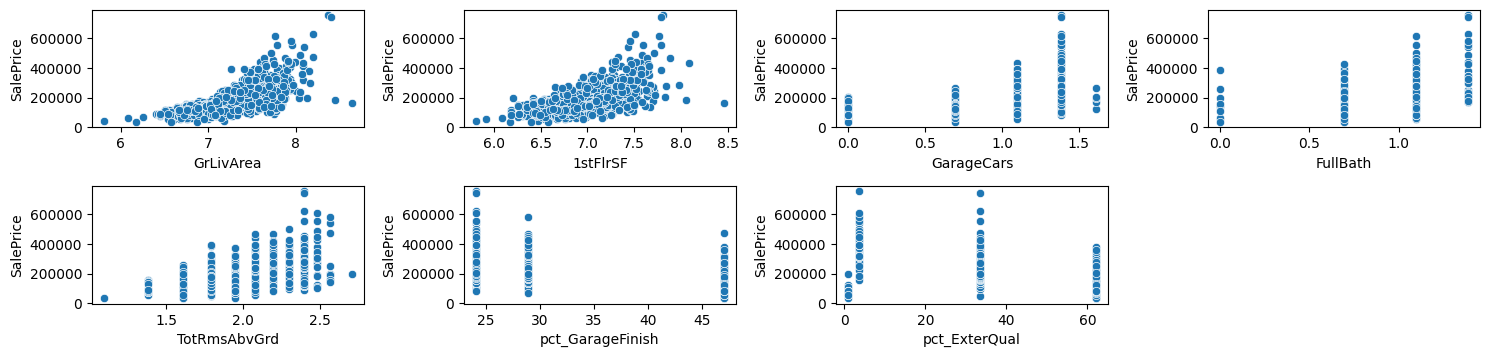

In [ ]:
# Menampilkan Scatterplot variabel X terhadap variabel Y
plt.figure(figsize=(15, 5)) #membuat plot dengan panjang 15 dan lebar 5
for i in range(0, len(X.columns)): #fungsi looping dari 0 hingga jumlah X. 
    plt.subplot(3, 4, i+1) #membuat subplot
    sns.scatterplot(df, x=X.columns[i], y='SalePrice') 
    plt.tight_layout() #untuk merapatkan visualisasi

Berdasarkan scatterplot di atas, terlihat bahwa variabel `GrLivArea`,	`1stFlrSF`,	`GarageCars`,	`FullBath`,	`TotRmsAbvGrd`, memiliki hubungan linearitas ke atas terhadap variabel `SalePrice`. Artinya, plot menunjukkan korelasi positif. Korelasi positif ini menandakan apabila nilai variabel X meningkat maka variabel Y juga akan meningkat. Sedangkan, variabel `pct_GarageFinish` dan	`pct_ExterQual` memiliki hubungan linearitas yang berbanding terbalik (ke bawah). Artinya, plot menunjukkan korelasi negatif yaitu jika nilai variabel X meningkat maka variabel Y akan menurun.

### Model Regresi

In [ ]:
#Model Regresi dengan bantuan library dimana fit adalah fungsi untuk membentuk model pada data train
model = LinearRegression().fit(train_X, train_y) 

#Intercept
b0 = round(float(model.intercept_),4)
print('intercept (b0 ) : ', b0) #menampilkan nilai intercept

#Slope
for i in range(len(X.columns)):
  b = round(float(model.coef_[i]),4) #looping koefisien prediktor
  print(f'slope (b{i+1}) :', b) #menampilkan niali slope

intercept (b0 ) :  -750460.2922
slope (b1) : 92927.5065
slope (b2) : 50356.1341
slope (b3) : 38897.71
slope (b4) : -3760.6812
slope (b5) : -13385.2864
slope (b6) : -1045.6525
slope (b7) : -1335.4785


Berdasarkan output diatas diperoleh model regresi sebagai berikut:

y = -750460.2922 + 92927.5065(GrLivArea) + 50356.1341(1stFlrSF) + 38897.71(GarageCars) - 3760.6812(FullBath) - 13385.2864(TotRmsAbvGrd) - 1045.6525 (pct_GarageFinish) - 1335.4785(pct_ExterQual)

dimana 
- apabila terjadi kenaikan satu satuan pada varibel `GrLivArea` maka akan terjadi kenaikan sebesar 92927.5065 pada variabel y
- apabila terjadi kenaikan satu satuan pada varibel `1stFlrSF` maka akan terjadi kenaikan sebesar 50356.1341 pada variabel y
- apabila terjadi kenaikan satu satuan pada varibel `GarageCars` maka akan terjadi kenaikan sebesar 38897.71 pada variabel y
- apabila terjadi kenaikan satu satuan pada varibel `FullBath` maka akan terjadi penurunan sebesar 3760.6812 pada variabel y
- apabila terjadi kenaikan satu satuan pada varibel `TotRmsAbvGrd` maka akan terjadi penurunan sebesar 13385.2864 pada variabel y
- apabila terjadi kenaikan satu satuan pada varibel `pct_GarageFinish` maka akan terjadi penurunan sebesar 1045.6525 pada variabel y
- apabila terjadi kenaikan satu satuan pada varibel `pct_ExterQual` maka akan terjadi penurunan sebesar 1335.4785 pada variabel y

## Model Evaluasi

In [ ]:
linreg = LinearRegression() #mendefinisikan fungsi regresi linear
linreg.fit(train_X, train_y) #model regresi dari data train
linregpred = linreg.predict(test_X) #melakukan prediksi model

Setelah dibentuk suatu model regresi linear perlu dilakukan evaluasi model untuk mengetahui seberapa baik model yang terbentuk dalam memprediksi data.

Terdapat beberapa cara untuk mengevaluasi model regresi diantaranya menggunakan nilai error atau bisa dibilang nilai error ini seberapa jauh data prediksi yang kita lakukan dengan data aktualnya. Jenis perhitungan error, yaitu:
- Mean Absolute Error 
- Mean Square Error
- Root Mean Square Error
- Mean Absolute Precentage Error
- R-Square

In [ ]:
#menghitung nilai Means Absolute Error
mae=mean_absolute_error(test_y, linreg.predict(test_X)) 
#menghitung nilai Root Means Square Error
rmse=mean_squared_error(test_y, linreg.predict(test_X), squared=False)
#menghitung nilai Mean Absolute Precentage Error
mape=mean_absolute_percentage_error(test_y, linreg.predict(test_X))
#menghitung nilai R-Square
r2=r2_score(train_y, model.predict(train_X))
print(f"Matrix Evaluation\nMAE = {mae}\nRMSE= {rmse}\nMAPE= {mape}\nR-Square = {r2}") #menampilkan hasil


Matrix Evaluation
MAE = 28000.192556977287
RMSE= 39244.774483375484
MAPE= 0.17182910597601767
R-Square = 0.6964323109276921


Berdasarkan output di atas dapat diketahui bahwa:
- Nilai `MAE` merupakan nilai yang diperoleh dari penjumlahan nilai mutlak dari selisih nilai prediksi dan nilai sebenarnya.
- Nilai `RMSE` diperoleh dari akar dari rata-rata selisih kuadrat nilai prediksi dan nilai sebenarnya.
- Nilai `MAE` dan `RMSE` yang dihasilkan tidak terlalu jauh selisihnya sehingga hal ini bisa dikatakan baik karena semakin dekat selisih semakin dekat juga hasil prediksinya.
- Nilai `MAPE` bernilai 0.1718 atau dapat dikatakan bahwa presentase kesalahan hasil presiksi bernilai 17.18% hal ini menandakan bahwa model regresi yang dibentuk cukup baik untuk melakukan prediksi.
- Nilai `R-Square` menunjukan seberapa akurat model yang telah kita bentuk, berdasarkan output nilai R-Square pada model yang telah dibentuk sebesar 0.6964 artinya keakuratan model sebesar 69.64% variabel target dipengaruhi oleh variabel prediktor sedangkan 30.36% dipengaruhi oleh faktor lain.

## Hasil Prediksi

In [ ]:
linregpred #menampilkan nilai prediksi

array([ 48205.3143048 , 157820.47101605, 205136.21796226, 236109.10810932,
       190513.37479201, 266491.34151931, 273801.45144652, 121958.60087568,
       224412.85122556, 264518.03226274, 252451.41061429, 252414.74798362,
       221617.81552481, 257907.36028433, 224000.31755033, 165830.46516752,
       244073.08791502, 152975.79367822,  69470.57927326, 126353.10670849,
       123069.87466212, 221203.3600359 , 226465.59493952, 243582.04620661,
       186992.12645364, 269676.99740613, 204206.70276703, 169660.7121406 ,
       313393.92207014, 333897.25156008, 285713.20727502, 201672.39264655,
       125016.21469326, 204206.70276703, 128100.12189423, 215929.41050446,
       174730.89668778, 135227.71238887, 188722.61842314, 205982.29364228,
       114789.26640051, 258774.69731874, 139943.74260688, 250432.4953606 ,
       148985.91947789, 360557.14438401, 247933.92876604, 255458.1813559 ,
       133257.42123169, 138954.44262482, 113557.83197016, 125515.89659659,
       197716.51512584, 1

# Topik 14 : Clustering Modelling

## Load Data

Load dataset yang memiliki format csv yang diberi nama data_cluster dengan bantuan library pandas dengan code `data_cluster=pd.read_csv('Mall_Customers.csv)`.

Notes : data yang akan dipakai harus berada dalam directory google colab dengan cara mengupload

In [ ]:
data_cluster=pd.read_csv('Mall_Customers.csv')

## Exploratory Data Analysis

## Identifikasi Data

**Menampilkan data awal**

Akan ditampilkan 5 baris teratas dari data Mall Customer dengan code `data_cluster.head()`. Hal ini dilakukan untuk mengetahui gambaran awal data seperti apakah strukturnya sudah sesuai atau belum sehingga dapat mempermudah proses eksplorasi data selanjutnya.

In [ ]:
data_cluster.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Analisis data ini bertujuan untuk melakukan segmentasi customer sebuah mall dengan indikator tertentu dengan metode K-Means Clustering.

Variabel yang ada dalam dataset, diantaranya:
- `CustomerID` menunjukan identitas pelanggan mall 
- `Gender` menunjukan jenis kelamin pelanggan mall
- `Age` menujukan umur pelanggan mall
- `Annual Income` menunjukan pendapatan tahunan pelanggan mall
- `Spending Score` menunjukan skor yang diberikan oleh mall berdasarkan perilaku pelanggan dan sifat belanja

---
**Menampilkan Informasi Data**

In [ ]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Berdasarkan output di atas semua variabel memiliki tipe data yang telah sesuai dan tidak terdapat missing value tetapi perlu akan dicek lebih detail.

## Data Cleansing

### Missing Value

In [ ]:
data_cluster.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Berdasarkan output tersebut setiap variabel dalam dataset tidak memiliki missing value. Tetapi akan dihapus variabel `Customer ID` karena tidak diperlukan dalam analisis cluster.

In [ ]:
#akan dihapus kolom customerID dengan bantuan fungsi drop dimana axis = 1 menunjukan seluruh kolom dihapus
data_cluster=data_cluster.drop('CustomerID', axis=1)

In [ ]:
data_cluster.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Berdasarkan data di atas terlihat bahwa variabel CustomerID sudah tidak ada dalam dataset.

### Encoding Data

Akan dilakukan encoding data dengan metode `one hot encoding` dimana merepresentasikan data bertipe kategori sebagai vektor biner yang bernilai integer, 0 dan 1, dimana semua elemen akan bernilai 0 kecuali satu elemen yang bernilai 1, yaitu elemen yang memiliki nilai kategori tersebut.

In [ ]:
#akan dibentuk encoding data pada variabel gender dengan bantuan library pandas dengan fungsi dummies dimana prefix menunjukan bahwa awalan kata 'Gender'
dummies_gender=pd.get_dummies(data_cluster['Gender'],prefix='Gender')
#akan digabungkan data encoding yang telah terbentuk dengan dataframe 'data_cluster'
data_cluster=pd.concat([data_cluster,dummies_gender], axis=1)


In [ ]:
data_cluster.head() #digunakan untuk menampilkan data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0


Berdasarkan output di atas terlihat bahwa encoding data pada variabel Gender telah terbentuk pada kolom baru.

### Outlier

Akan ditampilkan variabel numerik dengan mengelompokan data kedalam satu array dengan nama numerik dimana variabel yang termasuk ke dalam numerik adalah variabel bukan bertipe object dan kategorik yaitu Gender_Male dan Gender_Female.

In [ ]:
numerik=[i for i in data_cluster.columns if data_cluster[i].dtypes != 'object' and i!='Gender_Female' and i!='Gender_Male']

---
**Outlier Detection**

Akan dibuat boxplot untuk mengetahui sebaran data dan apakah variabel mengandung nilai outlier. Boxplot ini digunakan untuk melihat outlier pada variabel numerik saja.

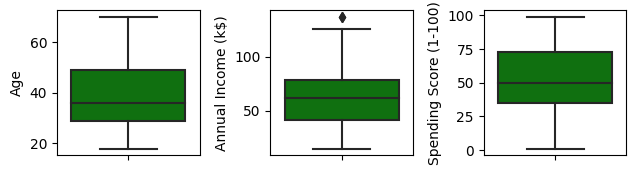

In [ ]:
plt.figure(figsize=(15,10)) #membuat plot dengan ukuran panjang 15 dan lebar 10
for i in range(0, len(numerik)): #fungsi looping dari 0 hingga banyaknya kolom numerik
    plt.subplot(6, 7 , i+1) #untuk membuat sub plot
    sns.boxplot(y=data_cluster[numerik[i]], color='green', orient='v') #membuat plot dengan bantuan library seaborn
    plt.tight_layout() #untuk merapatkan visualisasi


**Outlier Handling**

In [ ]:
#Penanganan Outlier dengan memilih data yang berada dikurang dari batas maksimum sehingga outlier dihapus karena jumlah yang sedikit
data_cluster=data_cluster[data_cluster['Annual Income (k$)']<130]

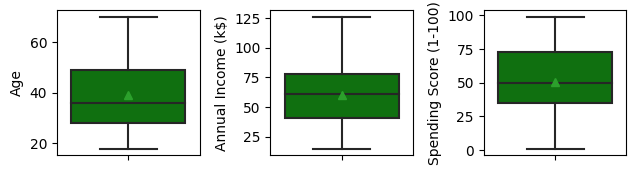

In [ ]:
plt.figure(figsize=(15,10)) #membuat plot dengan ukuran panjang 15 dan lebar 10
for i in range(0, len(numerik)): #fungsi looping dari 0 hingga banyaknya kolom numerik
    plt.subplot(6, 7 , i+1) #untuk membuat sub plot
    sns.boxplot(y=data_cluster[numerik[i]], color='green', orient='v', showmeans=True) #membuat plot dengan bantuan library seaborn
    plt.tight_layout() #untuk merapatkan visualisasi

Berdasarkan boxplot di atas terlihat bahwa ketiga variabel sudah tidak memiliki outlier atau data berada pada batas minimum dan maksimum.

## Statistical Summary

### Pendekatan Numerik

In [ ]:
data_cluster[['Age','Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,198.000000,198.000000,198.000000
mean,38.929293,59.787879,50.196970
std,14.016852,25.237259,25.746846
min,18.000000,15.000000,1.000000
25%,28.250000,40.500000,35.000000
50%,36.000000,61.000000,50.000000
75%,49.000000,77.750000,72.750000
max,70.000000,126.000000,99.000000


Berdasarkan output di atas dapat diketahui bahwa:
- `Variabel Age` memiliki nilai mean yang tidak terlalu jauh dengan nilai median namun terdapat indikasi right skewness karena nilai mean yang lebih besar dari pada nilai median atau dalam kata lain data memiliki distribusi `right skewed distribution.`
- `Variabel Annual Income (k$)` memiliki nilai mean yang tidak terlalu jauh dengan nilai median namun terdapat indikasi left skewness karena nilai mean yang lebih kecil dari pada nilai median atau dalam kata lain data memiliki distribusi `left skewed distribution.`
- `Variabel Spending Score (1-100)` memiliki nilai mean yang tidak terlalu jauh dan hampir sama sehingga terindikasi berdistribusi normal.

### Pendekatan Kategorik

In [ ]:
data_cluster[['Gender']].describe()

,Gender
count,198
unique,2
top,Female
freq,112


Berdasarkan output di atas, diketahui:
- dari baris `count` diketahui terdapat Nilai NULL untuk setiap variabel.
- dari baris `unique` diketahui jumlah nilai jenis untuk setiap variabel. Dan count unique untuk setiap variabel sudah sesuai.
- dari baris `top` menunjukkan sebagian besar/modus unik untuk setiap variabel.
- dari baris `freq` tampilkan jumlah modus unique (hitung nilai terbanyak) untuk setiap variabel. Dan berdasarkan baris `freq`, kita dapat membandingkan `hitung nilai terbanyak` dengan `nilai total` pada baris `hitung` untuk setiap variabel sehingga kita mengetahui distribusi untuk masing-masing variabel. 

Diketahui bahwa `variabel Gender` tidak memiliki ketimpangan

## Univariate Analysis

### Histogram Plot

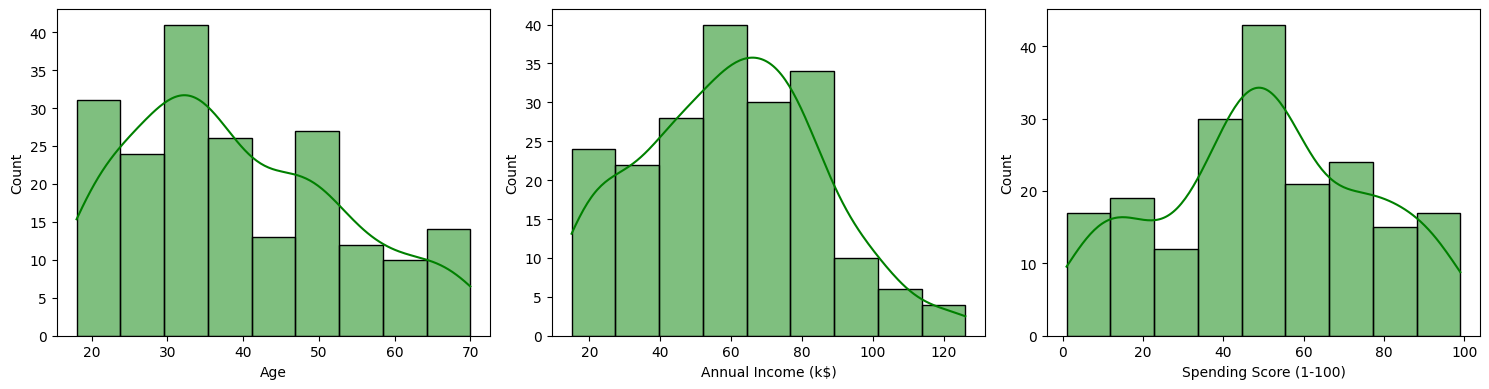

In [ ]:
plt.figure(figsize = (15,4)) #membuat plot dengan plot dengan ukuran panjang 15 dan lebar 4
for i in range(0, len(numerik)): #fungsi looping untuk variabel numerik dari 0 sampai jumlah variabel numerik
    plt.subplot(1, 3, i+1) #membuat subplot
    sns.histplot(data_cluster[numerik[i]], color = 'green', kde = True) #membuat histogram dengan bantuan library seaborn
    plt.tight_layout() #merapatkan visualisasi

Berdasarkan output di atas dapat diketahui bahwa:
- `Age` memiliki distribusi right skewed karena sebaran data yang cenderung menyebar kesebelah kanan.
- `Annual Income (k$)` memiliki distribusi right skewed karena sebaran data yang cenderung menyebar kesebelah kanan.
- `Spending Score (1-100)` memiliki distribusi yang cenderung normal karena sebaran data yang menyebabkan pola simetris.

### Count Plot

<Axes: xlabel='Gender', ylabel='count'>

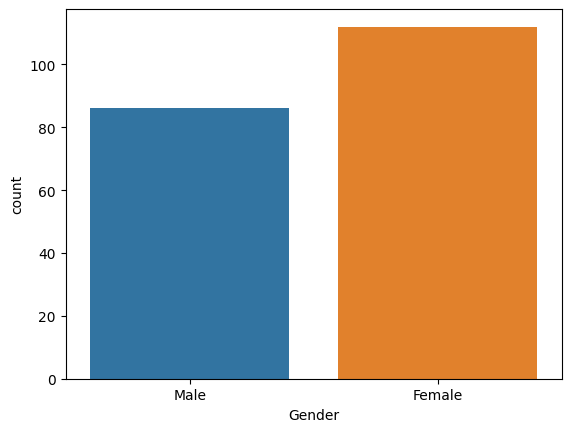

In [ ]:
#membuat count plot variabel Gender dengan library seaborn
sns.countplot(data=data_cluster,x='Gender')

Berdasarkan countplot di atas terlihat bahwa jumlah customer laki-laki dan perempuan tidak terlalu terjadi ketimpangan.

## Multivariate Analysis

### Heatmap

<Axes: >

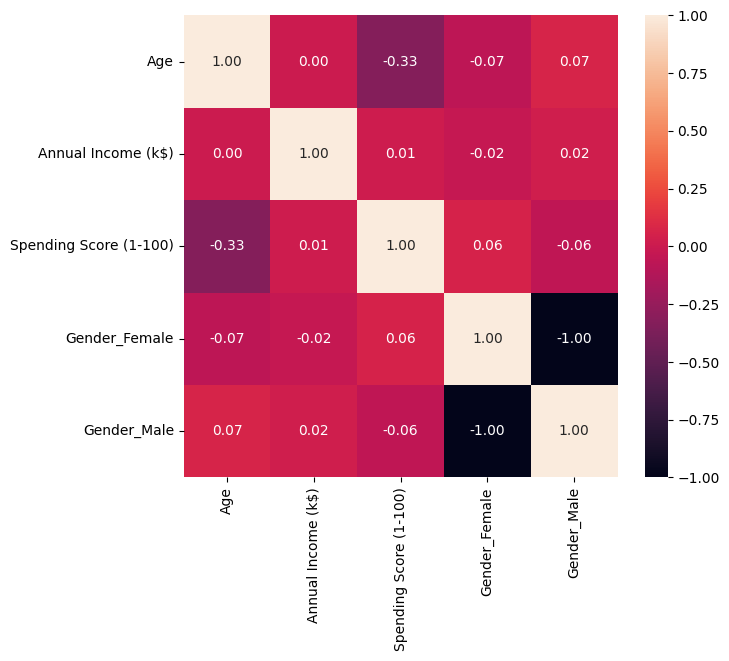

In [ ]:
plt.figure(figsize=(7, 6)) #membuat plot dengan ukuran panjang 7 dan lebar 6
sns.heatmap(data_cluster.corr(), annot=True, fmt='.2f') #membuat heatmap dengan library seaborn dari variabel numerik yang ada di dataframe 'data_cluster

Berdasarkan heatmap di atas terlihat bahwa seluruh variabel kurang memiliki nilai korelasi yang kuat. Variabel yang memiliki korelasi kuat adalah variabel `Age` dan `Spending Score (1-100)` sebesar -0.33.

### Pair Plot

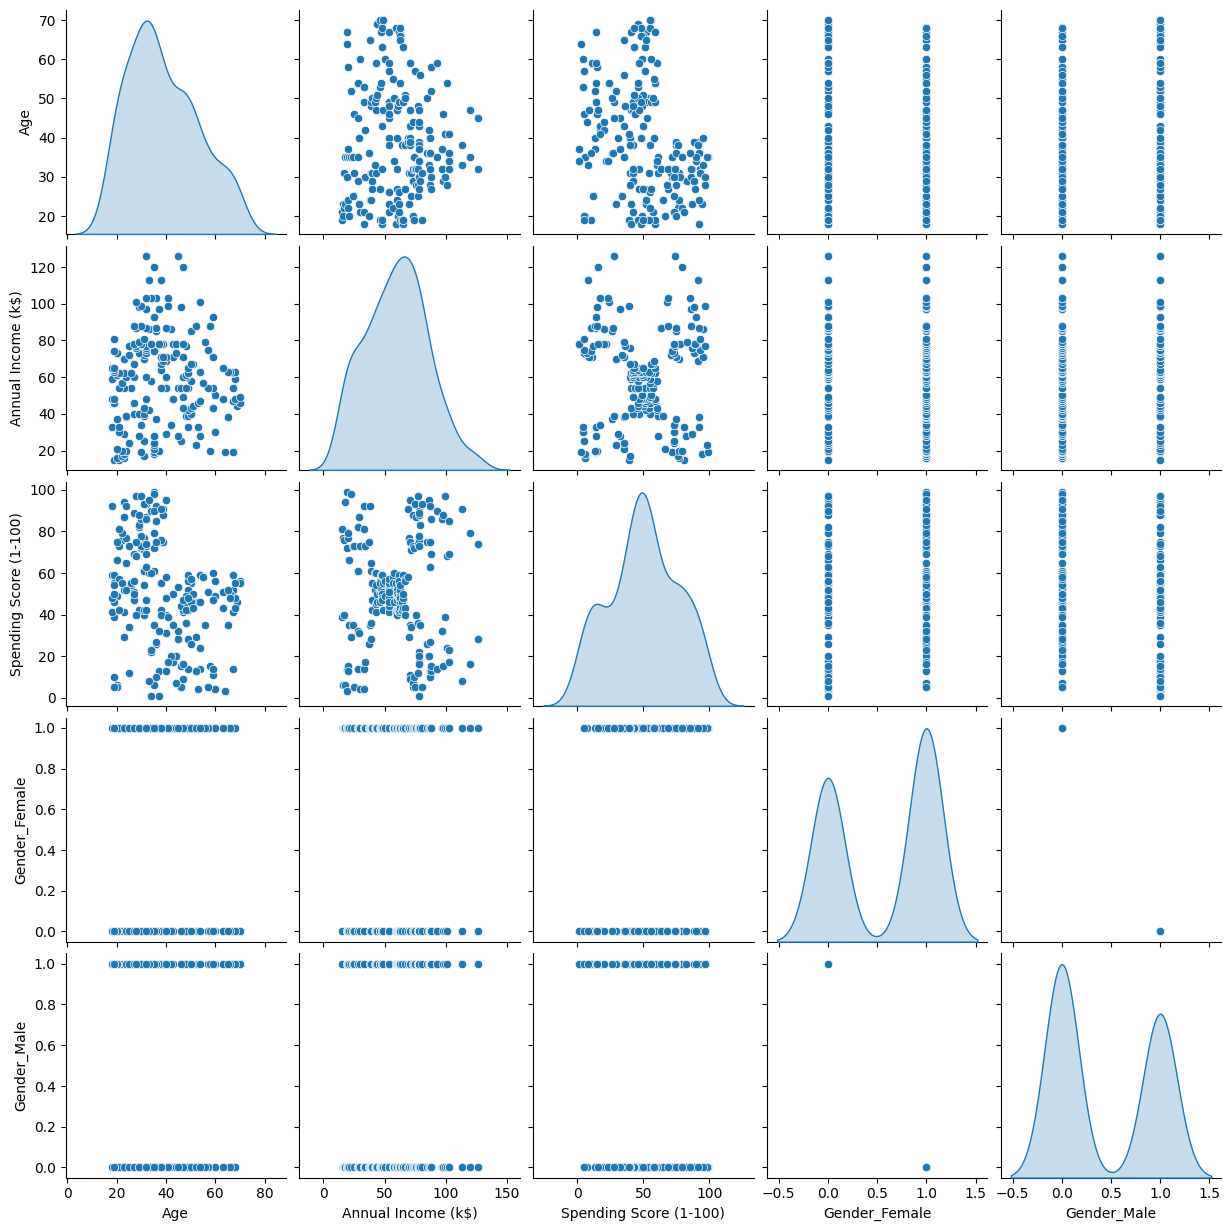

In [ ]:
sns.pairplot(data_cluster, diag_kind = 'kde')

Berdasarkan pair plot di atas, untuk analisis clustering terlihat variabel yang membentuk sebuah cluster tertentu adalah variabel `Spending Score (1-100)` dan `Annual Income (k$)` sedangkan untuk variabel lainnya tidak terlihat membentuk cluster-cluster dan tersebar acak sehingga kedua variabel tersebut yang akan digunakan sebagai fitur dalam clustering.

## Model Clustering

**Menentukan fitur**

Sebelum melakukan model clustering akan dipilih fitur yang akan digunakan dalam membuat clustering. Berdasarkan multivariate analysis pada pair plot akan digunakan variabel `Annual Income (k$)` dan `Spending Score (1-100)`

In [ ]:
fitur = ['Annual Income (k$)','Spending Score (1-100)'] #memilih fitur yang digunakan dalam clustering
dataset = data_cluster[fitur].copy() #mendefinisikan dataset yang berisikan variabel fitur dari dataframe 'data_cluster'
dataset #menampilkan dataset

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
193,113,91
194,120,16
195,120,79
196,126,28


### Scalling

Selanjutnya perlu dilakukan proses scalling data dimana data akan distandardisasi sehingga memiliki satuan yang sama. Hal ini dilakukan dengan tujuan untuk mengurangi kesalahan analisis nantinya. Akan dibuat data baru dengan nama `X_std` dimana bersikan data yang akan distandardisasi dengan bantuan library `StandarScaler` dengan fungsi `fit_transform`

In [ ]:
X_std = StandardScaler().fit_transform(dataset)

Kemudian akan ditampilkan data yang telah distandardisasi ke dalam sebuah dataframe dengan nama `data_std`

In [ ]:
data_std = pd.DataFrame(data = X_std, columns = fitur)
data_std.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.779171,-0.435989
1,-1.779171,1.199413
2,-1.739447,-1.720949
3,-1.739447,1.043661
4,-1.699723,-0.397051


Berdasarkan output di atas terlihat bahwa variabel fitur telah berubah menjadi data yang telah distandardisasi.

### Jumlah Cluster (k)

Akan ditentukan jumlah cluster yang digunakan dalam clustering nantinya. Dalam menentukan jumlah cluster yang optimum bisa menggunakan 2 metode yaitu:
- Metode Elbow merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster terbaik dengan cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik.
- Metode Silhouette merupakan metode yang dilakukan dengan membandingkan jarak rata-rata objek dalam suatu cluster dengan jaraka antar objek dengan cluster berbeda.

**Metode Elbow**

<Axes: >

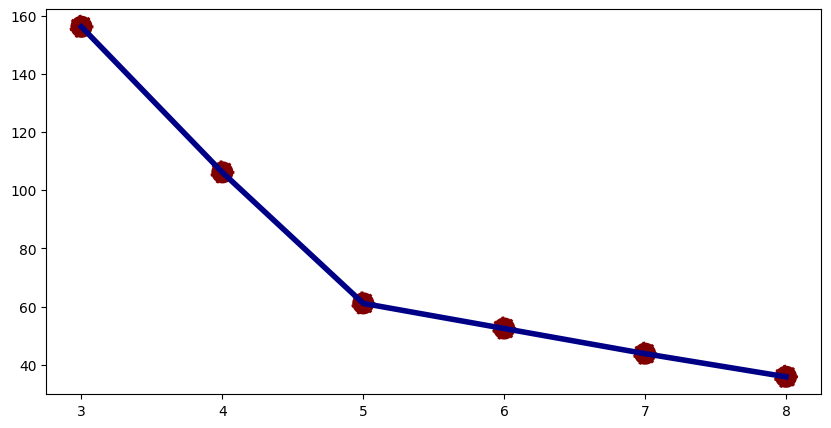

In [ ]:
inertia = []

for i in range(3, 9): #fungsi looping inertia
    kmeans = KMeans(n_clusters=i, random_state=0) #fungsi k-means clustering
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_) #untuk mendapatkan jumlah cluster yang sesuai

plt.figure(figsize=(10, 5)) #membuat plot metode elbow

sns.lineplot(x=range(3, 9), y=inertia, color='#000087', linewidth = 4) #menampilkan line dari jumlah cluster
sns.scatterplot(x=range(3, 9), y=inertia, s=300, color='#800000',  linestyle='--') #menampilkan scatterplot dari jumlah cluster

Berdasarkan output di atas terlihat bahwa jumlah cluster optimum yang digunakan dalam analisis k-means clustering dengan metode elbow adalah `5 cluster`.

**Metode Silhouette**

<Axes: >

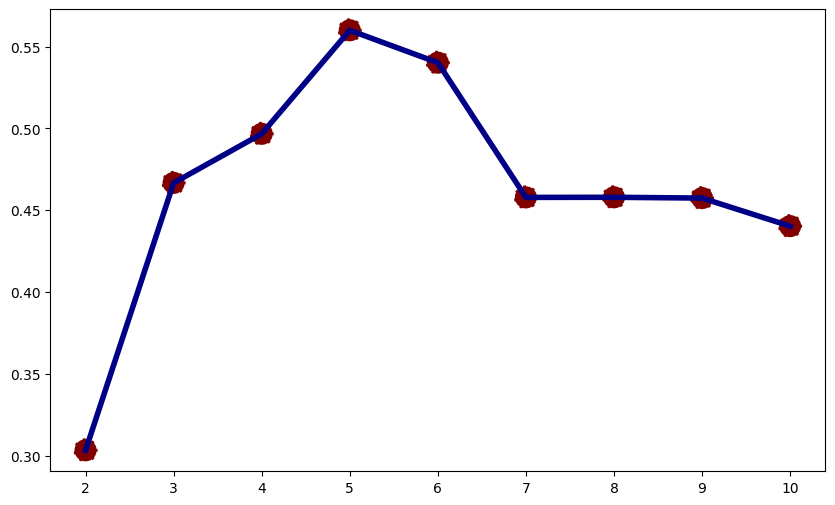

In [ ]:
arr_silhouette_score_euclidean = [] 
for i in range(2,11): #fungsi looping
    kmeans = KMeans(n_clusters=i).fit(data_std) #k-means clustering dengan data standardisasi
    preds = kmeans.predict(data_std) #prediksi k-means clustering
     
    score_euclidean = silhouette_score(data_std, preds, metric='euclidean') #menampilkan score euclidean
    arr_silhouette_score_euclidean.append(score_euclidean)
    
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

Berdasarkan output di atas terlihat bahwa jumlah cluster optimum yang digunakan dalam analisis k-means clustering dengan metode silhouette adalah `5 cluster`.

### Proses Clustering

Akan dibentuk cluster pada setiap data sehingga akan terlihat data dalam dataset mall customer masuk ke cluster berapa.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0) #fungsi k-means dimana nilai cluster yang ingin dibentuk adalah 5
kmeans.fit(data_std.values) #membuat model clustering dari data yang telah terstandardisasi
data_cluster['cluster'] = kmeans.labels_ #menambah kolom cluster yang berisikan daftar cluster setiap data
data_cluster.head() #menampilkan data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,Male,19,15,39,0,1,2
1,Male,21,15,81,0,1,3
2,Female,20,16,6,1,0,2
3,Female,23,16,77,1,0,3
4,Female,31,17,40,1,0,2


Berdasarkan output di atas terlihat bahwa setiap data dalam dataset telah terkelompokan menjadi beberapa cluster.


---
**Scatterplot Clustering**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

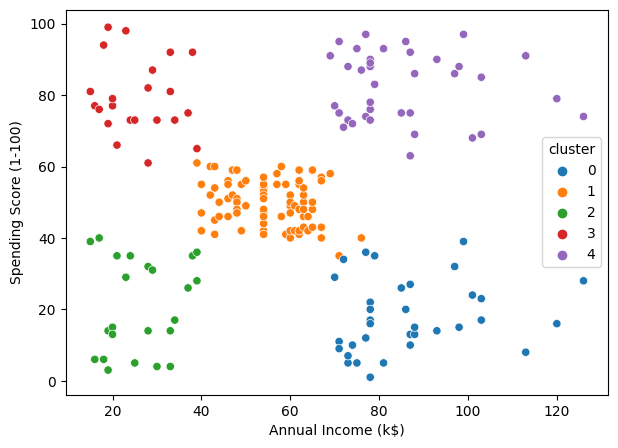

In [ ]:
fig, ax = plt.subplots(figsize=(7,5)) #untuk membuat plot dengan ukuran panjang 7 dan lebar 5

#akan dibuat scatterplot dengan menggunakan variabel fitur berdasarkan cluster yang telah terbentuk
sns.scatterplot(data_cluster, x=data_cluster['Annual Income (k$)'],  y=data_cluster['Spending Score (1-100)'], hue='cluster', palette="tab10") 

Berdasarkan output di atas dapat diketahui bahwa:
- cluster 0 merupakan cluster dengan nilai `Annual Income` yang tinggi dan `Spending Score` yang rendah atau customer yang berada dalam cluster ini memiliki pendapatan tahunan yang tinggi tetapi jarang berbelanja.
- cluster 1 merupakan cluster dengan nilai `Annual Income` yang sedang dan `Spending Score` yang sedang atau customer yang berada dalam cluster ini memiliki pendapatan tahunan yang sedang dan frekuensi berbelanja yang normal.
- cluster 2 merupakan cluster dengan nilai `Annual Income` yang rendah dan `Spending Income` yang rendah atau customer yang berada dalam cluster ini memiliki pendapatan tahunan yang rendah dan jarang berbelanja.
- cluster 3 merupakan cluster dengan nilai `Annual Income` yang rendah dan `Spending Score` yang tinggi customer yang berada dalam cluster ini memiliki pendapatan tahunan yang rendah tetapi sering berbelanja.
- cluster 4 merupakan cluster dengan nilai `Annual Income` yang tinggi dan `Spending Score` yang tinggi atau customer yang berada dalam cluster ini memiliki pendapatan tahunan yang tinggi dan sering berbelanja.

### Evaluasi Model

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(data_std)
 
print("Matriks Evaluasi")
print("Silhouette Coefficient: %0.3f" % silhouette_score(data_std, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(data_std, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(data_std,labels))

Matriks Evaluasi
Silhouette Coefficient: 0.560
Calinski-Harabasz Index: 264.535
Davies-Bouldin Index: 0.566


Berdasarkan nilai matriks evaluasi di atas diketahui bahwa:

- `Nilai Silhouette Coefficient` yang tinggi menunjukkan bahwa objek-objek pada cluster memiliki kesamaan yang tinggi dan memiliki perbedaan yang tinggi dengan objek yang berada di cluster lainnya. Semakin dekat nilai Silhouette Coefficient dengan 1, semakin baik performa clustering.

- `Nilai Calinski-Harabasz Index` yang tinggi menunjukkan bahwa cluster-clusternya memiliki kepadatan yang tinggi dan terpisah dengan baik dari cluster lainnya. Semakin tinggi nilai Calinski-Harabasz Index, semakin baik performa clustering.

- `Nilai Davies-Bouldin Index` yang rendah menunjukkan bahwa cluster-clusternya memiliki jarak yang cukup jauh antara satu dengan yang lainnya dan cluster-clusternya lebih kompak. Semakin rendah nilai Davies-Bouldin Index, semakin baik performa clustering.

Berdasarkan nilai matrik evaluasi di atas dapat disimpulkan bahwa performa Clustering yang telah dilakukan cukup baik.